In [1]:
import numpy as np#load ice cube data
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad


# LOADING FILES

In [2]:
files=["IC40_exp_new.csv","IC59_exp_new.csv","IC79_exp_new.csv","IC86_I_exp_new.csv","IC86_II_exp_new.csv", 
       "IC86_III_exp_new.csv","IC86_IV_exp_new.csv","IC86_V_exp_new.csv","IC86_VI_exp_new.csv",
       "IC86_VII_exp_new.csv"]

In [3]:
data=np.loadtxt("IC40_exp_new.csv")
for name in files[1:]:#indexing the list
    da=np.loadtxt(name)
    data=np.vstack((data,da))#load everyfile
mjd,log10_E,Ang_err,RA,Dec,Azim,Zenith=data.T
len(RA)
    

1134431

In [4]:
fields=[log10_E,RA,Dec,Ang_err]
print(Dec)
iceang=fields[3]

[ 16.76  -13.371  11.29  ...  42.543  44.72    4.708]


In [5]:
print(fields)

[array([3.31, 5.17, 3.92, ..., 2.88, 2.98, 3.28]), array([203.024,  75.024,  97.501, ..., 308.127, 332.199, 213.309]), array([ 16.76 , -13.371,  11.29 , ...,  42.543,  44.72 ,   4.708]), array([0.48, 0.62, 0.56, ..., 0.3 , 0.21, 0.25])]


In [6]:
df=pd.read_csv("TabO1.csv")
#print(df)
df.loc[31, 'RA'] = '08 43 00.0'
df.loc[31, 'Decl'] = '+73 30 00'
df.loc[32, 'RA'] = '00 47 30.0'
df.loc[32, 'Decl'] = '-25 11 37 '
df.loc[33,'RA']='09 52 34.1'
df.loc[33,'Decl']='+68 50 42'
df.loc[34,'RA']='00 44 18.0'
df.loc[34,'Decl']='+42 18 00'
df.loc[35,'RA']='13 42 06.24'
df.loc[35,'Decl']='-26 53 48.1'
df.loc[36,'RA']='00 49 12.0 '
df.loc[36,'Decl']='26 06 00  '

df.to_csv("updated_file.csv", index=False)
print(df)

#df.loc[1, 'RA'] = '09 55 59.28'
#df.loc[1, 'Decl'] = '+69 41 02.40'


                     Name     Period    Period_Err Pdot_lim          Pdot  \
0   CXOU J010043.1-721134   8.020392  9.000000e-06      NaN  1.880000e-11   
1              4U 0142+61   8.688692  5.000000e-08      NaN  2.022000e-12   
2           SGR 0418+5729   9.078388  5.000000e-08      NaN  4.000000e-15   
3           SGR 0501+4516   5.762069  1.000000e-07      NaN  5.940000e-12   
4             SGR 0526-66   8.054400  2.000000e-04      NaN  3.800000e-11   
5          1E 1048.1-5937   6.457875  3.000000e-06      NaN  2.250000e-11   
6          1E 1547.0-5408   2.072125  1.000000e-07      NaN  4.770000e-11   
7          PSR J1622-4950   4.326100  1.000000e-04      NaN  1.700000e-11   
8             SGR 1627-41   2.594578  6.000000e-06      NaN  1.900000e-11   
9   CXOU J164710.2-455216  10.610644  1.700000e-05        <  4.000000e-13   
10  1RXS J170849.0-400910  11.005025  1.700000e-07      NaN  1.945500e-11   
11  CXOU J171405.7-381031   3.825352  4.000000e-06      NaN  6.400000e-11   

In [7]:
df1=df.rename({'RA':'RA_M'},axis=1)
print(df1)

                     Name     Period    Period_Err Pdot_lim          Pdot  \
0   CXOU J010043.1-721134   8.020392  9.000000e-06      NaN  1.880000e-11   
1              4U 0142+61   8.688692  5.000000e-08      NaN  2.022000e-12   
2           SGR 0418+5729   9.078388  5.000000e-08      NaN  4.000000e-15   
3           SGR 0501+4516   5.762069  1.000000e-07      NaN  5.940000e-12   
4             SGR 0526-66   8.054400  2.000000e-04      NaN  3.800000e-11   
5          1E 1048.1-5937   6.457875  3.000000e-06      NaN  2.250000e-11   
6          1E 1547.0-5408   2.072125  1.000000e-07      NaN  4.770000e-11   
7          PSR J1622-4950   4.326100  1.000000e-04      NaN  1.700000e-11   
8             SGR 1627-41   2.594578  6.000000e-06      NaN  1.900000e-11   
9   CXOU J164710.2-455216  10.610644  1.700000e-05        <  4.000000e-13   
10  1RXS J170849.0-400910  11.005025  1.700000e-07      NaN  1.945500e-11   
11  CXOU J171405.7-381031   3.825352  4.000000e-06      NaN  6.400000e-11   

In [8]:
import re
def convert_ra_to_comma(ra):#replacing space with comma
    return re.sub(r"\s+", ",",ra.strip())
df1['RA_M_comma'] = df1['RA_M'].apply(convert_ra_to_comma)# Apply the function to the entire RA_M column
def convert_dec_to_comma(dec):
    return re.sub(r"\s+", ",",dec.strip())
df1['dec_M_comma'] = df1['Decl'].apply(convert_dec_to_comma)
    
print(df1[['Name', 'RA_M', 'RA_M_comma', 'Decl','dec_M_comma']])# Show the DataFrame with the new RA_M_Comma column

                     Name            RA_M      RA_M_comma            Decl  \
0   CXOU J010043.1-721134     01 00 43.14     01,00,43.14     -72 11 33.8   
1              4U 0142+61    01 46 22.407    01,46,22.407    +61 45 03.19   
2           SGR 0418+5729    04 18 33.867    04,18,33.867    +57 32 22.91   
3           SGR 0501+4516     05 01 06.76     05,01,06.76    +45 16 33.92   
4             SGR 0526-66     05 26 00.89     05,26,00.89     -66 04 36.3   
5          1E 1048.1-5937     10 50 07.14     10,50,07.14     -59 53 21.4   
6          1E 1547.0-5408  15 50 54.12386  15,50,54.12386  -54 18 24.1141   
7          PSR J1622-4950     16 22 44.89     16,22,44.89     -49 50 52.7   
8             SGR 1627-41    16 35 51.844    16,35,51.844    -47 35 23.31   
9   CXOU J164710.2-455216     16 47 10.20     16,47,10.20    -45 52 16.90   
10  1RXS J170849.0-400910     17 08 46.87     17,08,46.87    -40 08 52.44   
11  CXOU J171405.7-381031     17 14 05.74     17,14,05.74     -38 10 30.9   

In [9]:
def ra_to_degrees(ra_string):
    ra_parts = ra_string.split(',')
    ra_hours = int(ra_parts[0])  # Convert to integer (handles leading zeros)
    ra_minutes = int(ra_parts[1])  # Convert to integer (handles leading zeros)
    ra_seconds = float(ra_parts[2])  # Convert to float
    return (ra_hours * 15) + (ra_minutes / 4) + (ra_seconds / 240)
#field3.loc[:,'RA_M(deg)']=field3['RA_M_comma'].apply(ra_to_degrees)
def dec_to_degrees(dec_string):
    dec_parts = dec_string.split(',')
    dec_degrees = int(dec_parts[0])  # Convert to integer (handles leading zeros)
    dec_minutes = int(dec_parts[1])  # Convert to integer (handles leading zeros)
    dec_seconds = float(dec_parts[2])
    sign = 1 if dec_degrees >= 0 else -1
    return abs(dec_degrees) + (dec_minutes / 60) + (dec_seconds / 3600) * sign
df1['RA_M(deg)'] = df1['RA_M_comma'].apply(ra_to_degrees)
df1['Decl_M(deg)'] = df1['dec_M_comma'].apply(dec_to_degrees)
print(df1)

                     Name     Period    Period_Err Pdot_lim          Pdot  \
0   CXOU J010043.1-721134   8.020392  9.000000e-06      NaN  1.880000e-11   
1              4U 0142+61   8.688692  5.000000e-08      NaN  2.022000e-12   
2           SGR 0418+5729   9.078388  5.000000e-08      NaN  4.000000e-15   
3           SGR 0501+4516   5.762069  1.000000e-07      NaN  5.940000e-12   
4             SGR 0526-66   8.054400  2.000000e-04      NaN  3.800000e-11   
5          1E 1048.1-5937   6.457875  3.000000e-06      NaN  2.250000e-11   
6          1E 1547.0-5408   2.072125  1.000000e-07      NaN  4.770000e-11   
7          PSR J1622-4950   4.326100  1.000000e-04      NaN  1.700000e-11   
8             SGR 1627-41   2.594578  6.000000e-06      NaN  1.900000e-11   
9   CXOU J164710.2-455216  10.610644  1.700000e-05        <  4.000000e-13   
10  1RXS J170849.0-400910  11.005025  1.700000e-07      NaN  1.945500e-11   
11  CXOU J171405.7-381031   3.825352  4.000000e-06      NaN  6.400000e-11   

In [10]:
df1.at[32, 'Decl_M(deg)'] =- 25.02
df1.at[15, 'Decl_M(deg)'] = 16.11
df1.at[35, 'Decl_M(deg)'] =- 26.87 
df1.at[36, 'Decl_M(deg)'] = -26.10
field3 = df1[['RA_M(deg)', 'Decl_M(deg)']]
print(field3)


     RA_M(deg)  Decl_M(deg)
0    15.179750    72.173944
1    26.593363    61.750886
2    64.641113    57.539697
3    75.278167    45.276089
4    81.503708    66.056583
5   162.529750    59.877389
6   237.725516    54.293302
7   245.687042    49.818694
8   248.966017    47.576858
9   251.792500    45.861972
10  257.195292    40.118767
11  258.523917    38.158083
12  266.417350    28.991717
13  272.163904    20.388931
14  272.462862    19.702241
15  274.515417    16.110000
16  275.575000    16.059222
17  278.434875     8.514583
18  278.717158     8.734439
19  280.330596     4.930233
20  283.194458     0.554944
21  286.809708     9.322250
22  293.731657    21.896607
23  345.284562    58.879014
24  118.927000    29.536333
25  270.245833    22.920000
26  272.046667    20.619722
27  274.714083    15.977050
28  281.227833     2.918583
29  303.487083    34.330000
30  281.603917     2.958306
31  130.750000    73.500000
32   11.875000   -25.020000
33  148.142083    68.845000
34   11.075000    42

In [11]:
ra_mag=np.array(field3['RA_M(deg)'])
dec_mag=np.array(field3['Decl_M(deg)'])
ice_ra=(fields[1])
ice_dec=(fields[2])
print(ice_ra)
print(ice_dec)
print(ra_mag)
#print(dec_mag)|
print(dec_mag)

[203.024  75.024  97.501 ... 308.127 332.199 213.309]
[ 16.76  -13.371  11.29  ...  42.543  44.72    4.708]
[ 15.17975     26.5933625   64.6411125   75.27816667  81.50370833
 162.52975    237.72551608 245.68704167 248.96601667 251.7925
 257.19529167 258.52391667 266.41735    272.16390417 272.46286233
 274.51541667 275.575      278.434875   278.71715833 280.33059583
 283.19445833 286.80970833 293.7316575  345.2845625  118.927
 270.24583333 272.04666667 274.71408333 281.22783333 303.48708333
 281.60391667 130.75        11.875      148.14208333  11.075
 205.526       12.3       ]
[ 72.17394444  61.75088611  57.53969722  45.27608889  66.05658333
  59.87738889  54.29330164  49.81869444  47.57685833  45.86197222
  40.11876667  38.15808333  28.99171722  20.38893056  19.70224125
  16.11        16.05922222   8.51458333   8.73443889   4.93023333
   0.55494444   9.32225     21.89660733  58.87901389  29.53633333
  22.92        20.61972222  15.97705      2.91858333  34.33
   2.95830556  73.5       

# INTEGRAL OF AREA*DF/DE

In [12]:
column_namesarea = ["log10(E_nu/GeV)_min", "log10(E_nu/GeV)_max", "Dec_nu_min[deg]", "Dec_nu_max[deg]", "A_Eff[cm^2]"]
dataarea1= pd.read_csv("IC40_effectiveArea.csv", sep="\s+",  names=column_namesarea, skiprows=1)
dataarea2= pd.read_csv("IC59_effectiveArea.csv", sep="\s+", names=column_namesarea, skiprows=1)
dataarea3= pd.read_csv("IC79_effectiveArea.csv", sep="\s+", names=column_namesarea, skiprows=1)
dataarea4= pd.read_csv("IC86_I_effectiveArea.csv", sep="\s+",  names=column_namesarea, skiprows=1)
dataarea5= pd.read_csv("IC86_II_effectiveArea.csv", sep="\s+",  names=column_namesarea, skiprows=1)

In [13]:
gamma=-2.53
Emin1=dataarea1["log10(E_nu/GeV)_min"]
Emax1=dataarea1["log10(E_nu/GeV)_max"]
decmin1=dataarea1["Dec_nu_min[deg]"]
decmax1=dataarea1["Dec_nu_max[deg]"]
dec1=0.5*(decmin1+decmax1)
effarea1=dataarea1[ "A_Eff[cm^2]"]
Eff_1=[]
phiE_1=[]
for j in range(0,37):
    mdec=dec_mag[j]
    idx1=np.where((decmin1<=mdec)&(decmax1>mdec))
    log10E1=[0.5*(Emin1[i]+Emax1[i]) for i in idx1]
    A1=[effarea1[i] for i in idx1] #A in cm^2
    E1=pow(10,np.array(log10E1)-5)
    phiE1=E1**-gamma
    y1=A1*phiE1
    eff1=np.trapz(y1,x=E1)
    Eff_1.append(eff1)
    #phiE_1.append(phiE1)
#print(phiE_1)

In [14]:
#print(Eff_1)
#(phiE_1)

In [15]:
gamma=-2.53
Emin2=dataarea2["log10(E_nu/GeV)_min"]
Emax2=dataarea2["log10(E_nu/GeV)_max"]
decmin2=dataarea2["Dec_nu_min[deg]"]
decmax2=dataarea2["Dec_nu_max[deg]"]
dec2=0.5*(decmin2+decmax2)
effarea2=dataarea2[ "A_Eff[cm^2]"]
Eff_2=[]

for i in range(0,37):
    mdec=dec_mag[i]
    idx2=np.where((decmin2<=mdec)&(decmax2>mdec))
    log10E2=[0.5*(Emin2[i]+Emax2[i]) for i in idx2]
    A2=[effarea2[i] for i in idx2] #A in cm^2
    E2=pow(10,np.array(log10E2)-5)
    phiE2=E2**-gamma
    y2=A2*phiE2
    eff2=np.trapz(y2,x=E2)
    Eff_2.append(eff2)
print(Eff_2)
print(phiE2)

[array([4.97942152e+14]), array([8.64873574e+12]), array([7.77372024e+15]), array([5.65136948e+16]), array([8.64873574e+12]), array([7.77372024e+15]), array([4.20868873e+14]), array([5.2778216e+14]), array([3.08283203e+15]), array([5.65136948e+16]), array([2.03143342e+16]), array([2.90843304e+16]), array([6.49705961e+16]), array([3.05313913e+18]), array([3.05313913e+18]), array([1.40636314e+19]), array([1.40636314e+19]), array([1.75905395e+20]), array([1.75905395e+20]), array([5.34808417e+20]), array([4.60149792e+21]), array([7.272996e+19]), array([2.44168686e+18]), array([7.77372024e+15]), array([6.49705961e+16]), array([2.44168686e+18]), array([3.05313913e+18]), array([1.40636314e+19]), array([1.76546602e+21]), array([8.82345683e+17]), array([1.76546602e+21]), array([4.97942152e+14]), array([9.37526715e+20]), array([4.97942152e+14]), array([2.03143342e+16]), array([8.43190098e+20]), array([9.37526715e+20])]
[[4.60256574e-08 1.47570653e-07 4.73151259e-07 1.51705037e-06
  4.86407206e-0

In [16]:
gamma=-2.53
Emin3=dataarea3["log10(E_nu/GeV)_min"]
Emax3=dataarea3["log10(E_nu/GeV)_max"]
decmin3=dataarea3["Dec_nu_min[deg]"]
decmax3=dataarea3["Dec_nu_max[deg]"]
dec3=0.5*(decmin3+decmax3)
effarea3=dataarea3[ "A_Eff[cm^2]"]
Eff_3=[]

for i in range(0,37):
    mdec=dec_mag[i]
    idx3=np.where((decmin3<=mdec)&(decmax3>mdec))
    log10E3=[0.5*(Emin3[i]+Emax3[i]) for i in idx3]
    A3=[effarea3[i] for i in idx3] #A in cm^2
    E3=pow(10,np.array(log10E3)-5)
    phiE3=E3**-gamma
    y3=A3*phiE3
    eff3=np.trapz(y3,x=E3)
    Eff_3.append(eff3)
    
print(Eff_3)


[array([2.23290918e+14]), array([3.40098436e+15]), array([4.42614413e+14]), array([1.46402303e+15]), array([3.40098436e+15]), array([4.42614413e+14]), array([1.16837083e+17]), array([1.54013383e+17]), array([1.10599748e+16]), array([1.46402303e+15]), array([2.02515584e+17]), array([2.87018754e+15]), array([1.20232335e+17]), array([2.88707235e+18]), array([2.88707235e+18]), array([1.13566757e+19]), array([1.13566757e+19]), array([1.22421071e+20]), array([1.22421071e+20]), array([4.80597606e+20]), array([4.49468793e+21]), array([5.06691393e+19]), array([4.72939383e+17]), array([4.42614413e+14]), array([1.20232335e+17]), array([4.72939383e+17]), array([2.88707235e+18]), array([1.13566757e+19]), array([1.58892927e+21]), array([1.16034872e+17]), array([1.58892927e+21]), array([2.23290918e+14]), array([1.07699816e+21]), array([2.23290918e+14]), array([2.02515584e+17]), array([9.81763309e+20]), array([1.07699816e+21])]


In [17]:
gamma=-2.53
Emin=dataarea4["log10(E_nu/GeV)_min"]
Emax=dataarea4["log10(E_nu/GeV)_max"]
decmin=dataarea4["Dec_nu_min[deg]"]
decmax=dataarea4["Dec_nu_max[deg]"]
dec=0.5*(decmin+decmax)
effarea=dataarea4[ "A_Eff[cm^2]"]
Eff_4=[]
for i in range(0,37):
    mdec=dec_mag[i]
    idx=np.where((decmin<=mdec)&(decmax>mdec))
    log10E=[0.5*(Emin[i]+Emax[i]) for i in idx]
    A=[effarea[i] for i in idx] #A in cm^2
    E=pow(10,np.array(log10E)-5)
    phiE=E**-gamma
    y=A*phiE
    eff4=np.trapz(y,x=E)
    Eff_4.append(eff4)
#print (Eff_4)
print(log10E)

[560    2.1
561    2.3
562    2.5
563    2.7
564    2.9
565    3.1
566    3.3
567    3.5
568    3.7
569    3.9
570    4.1
571    4.3
572    4.5
573    4.7
574    4.9
575    5.1
576    5.3
577    5.5
578    5.7
579    5.9
580    6.1
581    6.3
582    6.5
583    6.7
584    6.9
585    7.1
586    7.3
587    7.5
588    7.7
589    7.9
590    8.1
591    8.3
592    8.5
593    8.7
594    8.9
595    9.1
596    9.3
597    9.5
598    9.7
599    9.9
dtype: float64]


In [18]:
gamma=-2.53
Emin=dataarea5["log10(E_nu/GeV)_min"]
Emax=dataarea5["log10(E_nu/GeV)_max"]
decmin=dataarea5["Dec_nu_min[deg]"]
decmax=dataarea5["Dec_nu_max[deg]"]
dec=0.5*(decmin+decmax)
effarea=dataarea5[ "A_Eff[cm^2]"]
Eff_5=[]
for i in range(0,37):
    mdec=dec_mag[i]
    idx=np.where((decmin<=mdec)&(decmax>mdec))
    log10E=[0.5*(Emin[i]+Emax[i]) for i in idx]
    A=[effarea[i] for i in idx] #A in cm^2
    E=pow(10,np.array(log10E)-5)
    phiE=E**-gamma
    y=A*phiE
    eff5=np.trapz(y,x=E)
    Eff_5.append(eff5)
   # print(idx)
print (Eff_5)


[array([2.89341641e+15]), array([3.76632962e+15]), array([5.68251941e+15]), array([9.21922006e+16]), array([3.76632962e+15]), array([5.68251941e+15]), array([3.10079663e+17]), array([1.78907589e+16]), array([2.10412946e+16]), array([9.21922006e+16]), array([1.10029083e+17]), array([6.27518902e+16]), array([1.56584634e+17]), array([2.14957957e+18]), array([2.14957957e+18]), array([9.33166567e+18]), array([9.33166567e+18]), array([2.42543007e+20]), array([2.42543007e+20]), array([7.14847312e+20]), array([4.27280148e+21]), array([9.36718813e+19]), array([3.64718166e+18]), array([5.68251941e+15]), array([1.56584634e+17]), array([3.64718166e+18]), array([2.14957957e+18]), array([9.33166567e+18]), array([1.78706371e+21]), array([2.50040149e+17]), array([1.78706371e+21]), array([2.89341641e+15]), array([1.53605117e+21]), array([2.89341641e+15]), array([1.10029083e+17]), array([1.44658337e+21]), array([1.53605117e+21])]


In [504]:
#np.vstack([Eff_1,Eff_2,Eff_3,Eff_4,Eff_5])

In [19]:
column_namestime=["MJD_start[days]","MJD_stop[days]"]
datatime1= pd.read_csv("IC40_exp(1).csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime2= pd.read_csv("IC59_exp.csv", sep="\s+", names=column_namestime, skiprows=1)
datatime3= pd.read_csv("IC79_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime4= pd.read_csv("IC86_I_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime5= pd.read_csv("IC86_II_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime6= pd.read_csv("IC86_III_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime7= pd.read_csv("IC86_IV_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime8= pd.read_csv("IC86_V_exp.csv", sep="\s+", names=column_namestime, skiprows=1)
datatime9= pd.read_csv("IC86_VI_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime10= pd.read_csv("IC86_VII_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)

In [20]:
#print(datatime10)
datatimesum1=np.sum(datatime1['MJD_stop[days]']-datatime1['MJD_start[days]'])
datatimesum2=np.sum(datatime2['MJD_stop[days]']-datatime2['MJD_start[days]'])
datatimesum3=np.sum(datatime3['MJD_stop[days]']-datatime3['MJD_start[days]'])
datatimesum4=np.sum(datatime4['MJD_stop[days]']-datatime4['MJD_start[days]'])
datatimesum5=np.sum(datatime5['MJD_stop[days]']-datatime5['MJD_start[days]'])
datatimesum6=np.sum(datatime6['MJD_stop[days]']-datatime6['MJD_start[days]'])
datatimesum7=np.sum(datatime7['MJD_stop[days]']-datatime7['MJD_start[days]'])
datatimesum8=np.sum(datatime8['MJD_stop[days]']-datatime8['MJD_start[days]'])
datatimesum9=np.sum(datatime9['MJD_stop[days]']-datatime9['MJD_start[days]'])
datatimesum10=np.sum(datatime10['MJD_stop[days]']-datatime10['MJD_start[days]'])
#print(datatimesum1)
print(datatimesum1)

376.3603109101532


In [223]:
nsj_1=np.array(Eff_1)*datatimesum1
nsj_2=np.array(Eff_2)*datatimesum2
nsj_3=np.array(Eff_3)*datatimesum3
nsj_4=np.array(Eff_4)*datatimesum4
nsj_5=np.array(Eff_5)*datatimesum5
nsj_6=np.array(Eff_5)*datatimesum6
nsj_7=np.array(Eff_5)*datatimesum7
nsj_8=np.array(Eff_5)*datatimesum8
nsj_9=np.array(Eff_5)*datatimesum9
nsj_10=np.array(Eff_5)*datatimesum10
#print(nsj_1)
#print(nsj_10)

In [224]:
total_nsj=(nsj_1+nsj_2+nsj_3+nsj_4+nsj_5+nsj_6+nsj_7+nsj_8+nsj_9+nsj_10)

print(total_nsj)
len(total_nsj)

[[7.97701715e+18]
 [9.62478651e+18]
 [2.86008692e+19]
 [2.36629301e+20]
 [9.62478651e+18]
 [2.86008692e+19]
 [7.18981769e+20]
 [9.25130054e+19]
 [5.52104279e+19]
 [2.36629301e+20]
 [4.28676702e+20]
 [1.87363453e+20]
 [1.24470315e+21]
 [1.00611690e+22]
 [1.00611690e+22]
 [5.20249610e+23]
 [5.20249610e+23]
 [1.12721835e+25]
 [1.12721835e+25]
 [9.40546977e+25]
 [3.29326084e+27]
 [3.00531319e+24]
 [6.61234672e+22]
 [2.86008692e+19]
 [1.24470315e+21]
 [6.61234672e+22]
 [1.00611690e+22]
 [5.20249610e+23]
 [6.04887980e+26]
 [1.35549151e+21]
 [6.04887980e+26]
 [7.97701715e+18]
 [6.72621030e+25]
 [7.97701715e+18]
 [4.28676702e+20]
 [4.98295023e+25]
 [6.72621030e+25]]


37

In [218]:
a=10**-7/(10**5)**2
b=10**-11/(10**5)**2
phi0= np.logspace(-21, -18, 40)#GeV cm^-2 sec^-1
nsj_tot=total_nsj*phi0
#print(nsj_tot)
len(nsj_tot[0])
#print(nsj_tot.shape)
dF=phiE2*phi0
#print(dF)
E_sqdf=E**2*dF
#print(E_sqdf)
print(phi0)

[1.00000000e-21 1.19377664e-21 1.42510267e-21 1.70125428e-21
 2.03091762e-21 2.42446202e-21 2.89426612e-21 3.45510729e-21
 4.12462638e-21 4.92388263e-21 5.87801607e-21 7.01703829e-21
 8.37677640e-21 1.00000000e-20 1.19377664e-20 1.42510267e-20
 1.70125428e-20 2.03091762e-20 2.42446202e-20 2.89426612e-20
 3.45510729e-20 4.12462638e-20 4.92388263e-20 5.87801607e-20
 7.01703829e-20 8.37677640e-20 1.00000000e-19 1.19377664e-19
 1.42510267e-19 1.70125428e-19 2.03091762e-19 2.42446202e-19
 2.89426612e-19 3.45510729e-19 4.12462638e-19 4.92388263e-19
 5.87801607e-19 7.01703829e-19 8.37677640e-19 1.00000000e-18]


In [219]:
print(nsj_tot)

[[7.97701715e-03 9.52277675e-03 1.13680684e-02 ... 5.59750348e+00
  6.68216890e+00 7.97701715e+00]
 [9.62478651e-03 1.14898453e-02 1.37163090e-02 ... 6.75374955e+00
  8.06246845e+00 9.62478651e+00]
 [2.86008692e-02 3.41430495e-02 4.07591750e-02 ... 2.00693394e+01
  2.39583086e+01 2.86008692e+01]
 ...
 [4.28676702e-01 5.11744234e-01 6.10908313e-01 ... 3.00804083e+02
  3.59092888e+02 4.28676702e+02]
 [4.98295023e+04 5.94852959e+04 7.10121568e+04 ... 3.49655526e+07
  4.17410599e+07 4.98295023e+07]
 [6.72621030e+04 8.02959274e+04 9.58554025e+04 ... 4.71980752e+07
  5.63439597e+07 6.72621030e+07]]


# CALCULATE NS

In [155]:
ns_in=[]
for j in range(0,40):
        nsj_t = nsj_tot[:,j]
        ns=np.sum(nsj_t)/37 #np.sum(xw_model=37)
        ns_in.append(ns)
print(ns_in)
ns_in=np.array(ns_in)
print(ns_in.shape)

[129965.52492183815, 155149.8078798458, 185214.21661344217, 221104.40550656506, 263949.27467389405, 315096.4787031624, 376154.81616230553, 449044.83320295153, 536059.2329602386, 639934.99088329, 763939.444332212, 911973.0643281001, 1088692.1420676224, 1299655.2492183812, 1551498.0787984573, 1852142.166134422, 2211044.055065651, 2639492.746738941, 3150964.787031624, 3761548.161623055, 4490448.332029518, 5360592.329602385, 6399349.908832899, 7639394.44332212, 9119730.643281, 10886921.420676224, 12996552.49218382, 15514980.78798458, 18521421.661344223, 22110440.55065651, 26394927.467389405, 31509647.87031623, 37615481.61623054, 44904483.320295155, 53605923.29602384, 63993499.088329, 76393944.43322119, 91197306.43281, 108869214.20676224, 129965524.92183813]
(40,)


In [156]:
declcut = 5 
band = 5   
w_model=1
delta_i = ice_dec[i]
N=len(ice_ra)
#decdiff=np.abs(ice_dec-dec_mag0)
#nuind=np.nonzero(decdiff < declcut)
#N_i = np.sum(decdiff < declcut)
def angular_separation(ra1, dec1, ra2, dec2):
    delta_ra = ra1 - ra2
    return np.arccos(np.sin(dec1) * np.sin(dec2) + np.cos(dec1) * np.cos(dec2) * np.cos(delta_ra))


def bg(dec_mag0,N_i, twopi = True):
        N_i = np.sum((ice_dec >= dec_mag0- 5) & (ice_dec <= dec_mag0 + 5))
        if twopi == True:
            s_ang = (np.sin(np.radians(dec_mag0 + band)) - np.sin(np.radians(dec_mag0 - band)))*(2 * np.pi)
            return N_i/(s_ang*N)
        else:
            s_ang = (np.sin(np.deg2rad(dec_mag0 + band)) - np.sin(np.deg2rad(dec_mag0- band)))
            return N_i/s_ang*N
for j in range(0,37):
        dec_mag0=dec_mag[j]
        print( bg(dec_mag0,N_i, twopi = True))
#print(N)

0.05978123493009543
0.06686155238396002
0.06854320630216458
0.07334457976523019
0.06439660915498299
0.06738532378542518
0.06970861094417502
0.07135421323145778
0.07213834883703917
0.0729648204940069
0.07660146455963081
0.07823853172786789
0.08902796127865578
0.10215235575742074
0.10313942732668073
0.1095986233195269
0.10969457513933081
0.12891588364335857
0.1283313554095528
0.1370316400693256
0.12291954764452845
0.12659138019580876
0.09948119327865625
0.06787675120351087
0.08818611970661994
0.09793150606972367
0.10173621136735733
0.10988132128365798
0.13509015672918426
0.08205015346791045
0.1351957049720378
0.059331959325967396
0.06761515754300376
0.06222851387227126
0.07500174269943206
0.06840618251456036
0.06819611914535428


In [175]:
w_accj=total_nsj
#print(w_accj)
type(w_accj)

numpy.ndarray

In [179]:
w_accsum=np.array(np.sum(w_accj))
type(w_accsum)

numpy.ndarray

In [184]:
def sig(ra_mag0,dec_mag0,ra_mag1,dec_mag1,ice_ra1,ice_dec1 ,iceang,declcut):
        decdiff=np.abs(ice_dec-dec_mag0)
        nuind=np.nonzero(decdiff < declcut)
        sg=np.radians(iceang[nuind])**2
        Ang_sep1=(np.arccos((np.sin(ice_dec1[nuind])*np.sin(dec_mag1)+np.cos(ice_dec1[nuind])*np.cos(dec_mag1)*np.cos(ice_ra1[nuind]-ra_mag1))))**2
        return ((np.exp(-1*Ang_sep1/(2*sg)))/(2*np.pi*sg))
    
def sig_i(w_accj,ra_mag0,dec_mag0,ra_mag1,dec_mag1,ice_ra1,ice_dec1 ,iceang,declcut):
    return np.sum(sig(ra_mag0,dec_mag0,ra_mag1,dec_mag1,ice_ra1,ice_dec1 ,iceang,declcut)*w_accj)/np.sum(w_accj)
for j in range(0,37):
        dec_mag0=dec_mag[j]
        N=len(ice_ra)
        ra_mag0=ra_mag[j]
        ra_mag1=np.radians(ra_mag0)
        dec_mag1=np.radians(dec_mag0)
        w_accj=total_nsj[j]
        S_i= np.array(sig_i(w_accj,ra_mag0,dec_mag0,ra_mag1,dec_mag1,ice_ra1,ice_dec1 ,iceang,declcut))
        print(S_i, type(S_i), np.shape(S_i))

        #len(S_i)

77431.18968330555 <class 'numpy.ndarray'> ()
73698.78081431903 <class 'numpy.ndarray'> ()
78677.2908106965 <class 'numpy.ndarray'> ()
77911.02474994404 <class 'numpy.ndarray'> ()
77038.17442664088 <class 'numpy.ndarray'> ()
66550.92180407161 <class 'numpy.ndarray'> ()
79800.26385690877 <class 'numpy.ndarray'> ()
82044.43093881333 <class 'numpy.ndarray'> ()
75622.45266320008 <class 'numpy.ndarray'> ()
85950.01567365667 <class 'numpy.ndarray'> ()
89401.98584597514 <class 'numpy.ndarray'> ()
87884.6698203452 <class 'numpy.ndarray'> ()
105060.34542147261 <class 'numpy.ndarray'> ()
105957.48419841041 <class 'numpy.ndarray'> ()
108843.73094980625 <class 'numpy.ndarray'> ()
119506.09722872092 <class 'numpy.ndarray'> ()
143579.18878394258 <class 'numpy.ndarray'> ()
141465.68940170598 <class 'numpy.ndarray'> ()
128503.14915368325 <class 'numpy.ndarray'> ()
166147.90465189496 <class 'numpy.ndarray'> ()
161903.20050604205 <class 'numpy.ndarray'> ()
161221.8478142979 <class 'numpy.ndarray'> ()
131

In [215]:
def P(ns_in,N,S_i,B_i):
    return (ns_in/N)*S_i+(1-(ns_in/N))*B_i
    
def TS(ns_in,N,S_i,B_i):
    return 2*np.sum(np.log((P(ns_in,N,S_i,B_i)/B_i)))
    

ice_ra1 = np.radians(ice_ra)
ice_dec1 = np.radians(ice_dec)

Ts_values = []
sqrt_TS = []
Background = []

for i in range(0,37):
    N=len(ice_ra)
    ra_mag0=ra_mag[i]
    dec_mag0=dec_mag[i]
    ra_mag1=np.radians(ra_mag0)
    dec_mag1=np.radians(dec_mag0)
    w_accj=total_nsj
    
    TS_i= P(ns_in,N,S_i,B_i)
    Ts_values.append(TS_i)
    sqrt_TS.append(np.sqrt(TS_i))
    #Background.append(B)
    B_i=bg(dec_mag0,N_i, twopi = True)
    S_i=sig_i(w_accj,ra_mag0,dec_mag0,ra_mag1,dec_mag1,ice_ra1,ice_dec1 ,iceang,declcut)
    print(Ts_values)
    #print(x_axisi)
    #plt.plot(x_axisi[0],TS_i)
  #  plt.show()
len(Ts_values)   

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649])]
[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

[array([   10073.85233653,    12025.91639661,    14356.24487467,
          17138.1365793 ,    20459.09391607,    24423.57521283,
          29156.28038142,    34806.0732638 ,    41550.66403731,
          49602.19896065,    59213.93328208,    70688.19720137,
          84385.90544908,   100737.90960022,   120258.55020107,
         143561.83498167,   171380.75202796,   204590.32539562,
         244235.13836323,   291562.1900491 ,   348060.11887291,
         415506.02660802,   496021.37584142,   592138.71905572,
         706881.35824861,   843858.44072575,  1007378.48223716,
        1202584.88824564,  1435617.7360516 ,  1713806.90651454,
        2045902.64019112,  2442350.76986724,  2915621.28672597,
        3480600.57496406,  4155059.65231512,  4960213.14464908,
        5921386.57679216,  7068812.96872107,  8438583.79349247,
       10073784.20860649]), array([   8870.9187784 ,   10589.88404399,   12641.94462598,
         15091.64661613,   18016.04363114,   21507.12047876,
         25674.68

37

ValueError: x and y must have same first dimension, but have shapes (1, 40) and (37, 40)

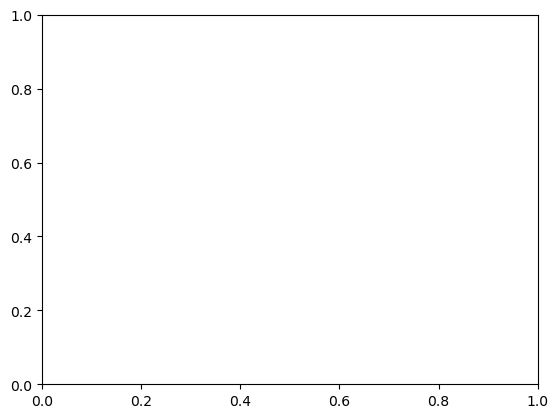

In [214]:

plt.plot(E_sqdf, Ts_values)

#print(x_axis)

In [205]:
for i in range(0,37):
    dec_mag0=dec_mag[i]
    print(dec_mag0)

72.17394444444444
61.750886111111114
57.53969722222222
45.276088888888886
66.05658333333334
59.87738888888889
54.293301638888884
49.818694444444446
47.576858333333334
45.86197222222222
40.118766666666666
38.15808333333333
28.99171722222222
20.388930555555554
19.702241249999997
16.11
16.05922222222222
8.514583333333334
8.734438888888889
4.930233333333334
0.5549444444444445
9.32225
21.896607333333332
58.87901388888889
29.536333333333335
22.92
20.619722222222222
15.977049999999998
2.9185833333333338
34.330000000000005
2.9583055555555555
73.5
-25.02
68.845
42.3
-26.87
-26.1


In [201]:
print(N_i)

76091


In [202]:
print(N)

1134431


In [203]:
decdiff=np.abs(ice_dec-dec_mag0)
nuind=np.nonzero(decdiff < declcut)

In [204]:
print(N1)

76071
